<a href="https://colab.research.google.com/github/Mooo49/projects/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation,Dropout,Dense



In [52]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [26]:
x_train.shape

(60000, 28, 28)

In [53]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train /= 255
x_test /= 255

In [37]:
x_test.shape

(10000, 784)

In [33]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [54]:
print('before :{}'.format(y_train.shape))
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
print('after :{}'.format(y_test.shape))

before :(60000,)
after :(10000, 10)


In [40]:
from tensorflow.keras.models import Sequential


In [55]:

model=Sequential()

model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [56]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [57]:
M=model.fit(x_train,y_train,batch_size=120,epochs=10,validation_data=(x_test,y_test),verbose=2)

Epoch 1/10
500/500 - 11s - loss: 0.2484 - accuracy: 0.9252 - val_loss: 0.1043 - val_accuracy: 0.9667 - 11s/epoch - 22ms/step
Epoch 2/10
500/500 - 8s - loss: 0.0982 - accuracy: 0.9697 - val_loss: 0.0789 - val_accuracy: 0.9762 - 8s/epoch - 17ms/step
Epoch 3/10
500/500 - 10s - loss: 0.0701 - accuracy: 0.9776 - val_loss: 0.0698 - val_accuracy: 0.9772 - 10s/epoch - 19ms/step
Epoch 4/10
500/500 - 10s - loss: 0.0567 - accuracy: 0.9818 - val_loss: 0.0631 - val_accuracy: 0.9794 - 10s/epoch - 20ms/step
Epoch 5/10
500/500 - 10s - loss: 0.0444 - accuracy: 0.9854 - val_loss: 0.0720 - val_accuracy: 0.9782 - 10s/epoch - 19ms/step
Epoch 6/10
500/500 - 9s - loss: 0.0386 - accuracy: 0.9872 - val_loss: 0.0665 - val_accuracy: 0.9802 - 9s/epoch - 17ms/step
Epoch 7/10
500/500 - 10s - loss: 0.0333 - accuracy: 0.9888 - val_loss: 0.0672 - val_accuracy: 0.9810 - 10s/epoch - 19ms/step
Epoch 8/10
500/500 - 9s - loss: 0.0295 - accuracy: 0.9902 - val_loss: 0.0681 - val_accuracy: 0.9817 - 9s/epoch - 19ms/step
Epoch 

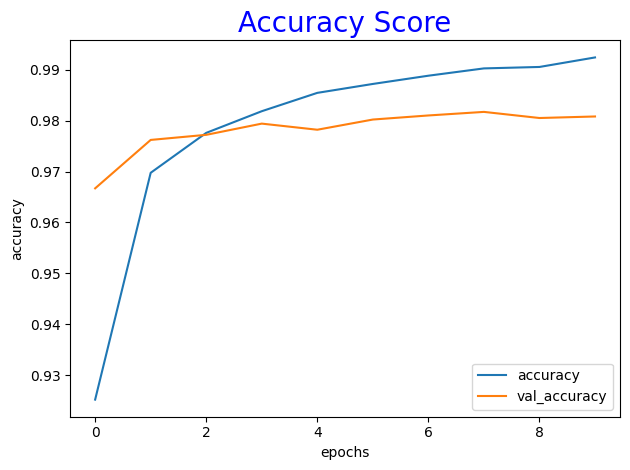

In [67]:
plt.plot(M.history['accuracy'],label='accuracy')
plt.plot(M.history['val_accuracy'],label='val_accuracy')

plt.title('Accuracy Score',color='blue',size=20)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.tight_layout()

In [68]:
loss_and_accuracy=model.evaluate(x_test,y_test)
print('test loss :{}'.format(loss_and_accuracy[0]))
print('test accuracy :{}'.format(loss_and_accuracy[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.0757 - accuracy: 0.9808
test loss :0.0757397785782814
test accuracy :0.9807999730110168


In [69]:
prediction=model.predict(x_test)


313/313 [==============================] - 2s 4ms/step


In [71]:
y_test[3]


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [73]:
import numpy as np
prediction=np.argmax(prediction,axis=-1)

In [74]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

9


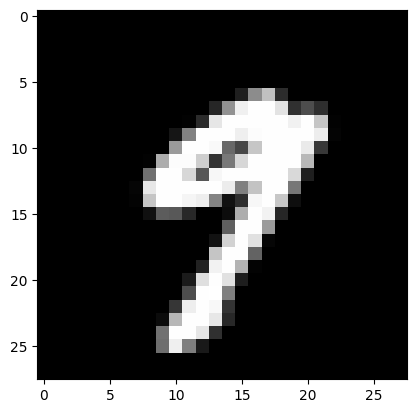

In [77]:
print(prediction[20])
plt.imshow(x_test[20].reshape(28,28),cmap='gray')
